In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Téléchargement des données 

## Données conso : 

Les données sont téléchargées sur : <br/>
https://www.rte-france.com/fr/eco2mix/eco2mix-telechargement

In [2]:
data = pd.read_excel("data.xlsx")
data.head()

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bio-énergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges aves la Suisse,Echanges avec l'Allemagne et la Belgique
0,0000-00,Données consolidées,Grand-Est,7296,5505.0,864,153.0,8,701,537,...,70,3364,3876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000-00,Données définitives,Nouvelle-Aquitaine,4523,3740.0,26,NaN,9,16,162,...,131,3222,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000-00,Données définitives,Auvergne-Rhône-Alpes,8890,5946.0,32,4.0,17,10,2632,...,79,5010,3658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000-00,Données définitives,Bourgogne-Franche-Comté,152,NaN,19,0.0,0,19,19,...,20,1533,-1383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000-00,Données définitives,Bretagne,197,NaN,3,NaN,3,0,46,...,37,1493,-1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Afin de coller avec les données DJU nous allons concentrer l'étude sur une région, et nous ne gardons que 
#Les données définitives.
conso = data.loc[data['Territoire'] == 'Auvergne-Rhône-Alpes']
conso = conso.loc[conso['Qualité'] == 'Données définitives']

#Les colonnes qui nous intéressent désormais sont la date et la conso : 
conso = conso[['Mois', 'Consommation totale']]

#Pas de données avant Janvier 2014, on enlève donc les mois précédents : 
conso = conso.loc[conso['Mois'] > "2013-12"]

#Les données DJU vont jusqu'au 05/2018 :
conso = conso.loc[conso['Mois'] < "2018-05"]

#On renomme les colonnes : 
conso = conso.rename(columns={'Mois':'date', 'Consommation totale':'consommation'})

#Split la colonne date en Année et Mois : 
#conso['annee'], conso['mois'] = conso['date'].str.split(pat='-').str
#conso = conso.drop(columns='date')

#On convertie ensuite la date en datetime :
from datetime import datetime
conso['date'] = pd.to_datetime(conso['date'], format='%Y-%m')
#Set index sur date : 
conso = conso.set_index('date')

conso.head()

,consommation
date,
2014-01-01,6693
2014-02-01,6013
2014-03-01,5965
2014-04-01,5139
2014-05-01,4858


## Données DJU

Données téléchargées sur : <br/>
https://cegibat.grdf.fr/simulateur/calcul-dju

In [4]:
dju = pd.read_excel('DJU.xlsx')

#On doit maintenant mettre en forme le Df, afin d'avoir une colonne année, une mois, une valeur :
dju = dju.stack()
dju = pd.DataFrame(dju)
dju = dju.reset_index()
dju = dju.rename(columns={"level_0":'annee', 'level_1':'mois', 0:'valeur'})

Il nous faut maintenant un index contenant la date complète; <br/>
On doit d'abord transformer le nom du mois en chiffre : 

In [5]:
def moisEnNum(shortMonth):
    m = {
            'Janvier' : 1,
            'Février' : 2,
            'Mars' : 3,
            'Avril' : 4,
            'Mai' : 5,
            'Juin' : 6,
            'Juillet' : 7,
            'Août' : 8,
            'Septembre' : 9, 
            'Octobre' : 10,
            'Novembre' : 11,
            'Décembre' : 12
    }
    resultats = []
    for i in shortMonth:
        out = m[i]
        resultats.append(out)    
    return resultats
    

dju['mois_num'] = moisEnNum(dju['mois'])

#On transforme ensuite cette colonne en date, ainsi que la colonne année : 
dju['date'] = dju['mois_num'].map(str) + '/' +  dju['annee'].map(str)
dju['date'] = pd.to_datetime(dju['date'], format='%m/%Y')

#On enlève les valeurs après Mai 2018 : 
dju = dju.loc[dju.date < '2018/05/01']

#On set l'index sur date: 
dju = dju.set_index('date')

#On ne garde que la colonne valeur : 
dju = dju[['valeur']]
dju.head()

,valeur
date,
2014-01-01,333.3
2014-02-01,294.7
2014-03-01,278.5
2014-04-01,184.0
2014-05-01,121.4


## Visualisation :

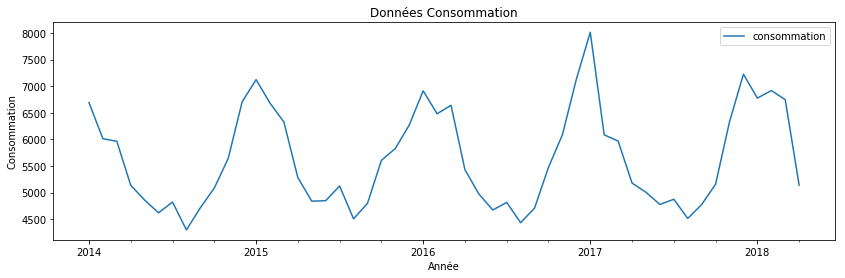

In [6]:
conso.plot(y='consommation', figsize=[14,4])
plt.xlabel('Année')
plt.ylabel('Consommation')
plt.title('Données Consommation')
plt.savefig("Graphiques/donnees_conso.png")
plt.show()

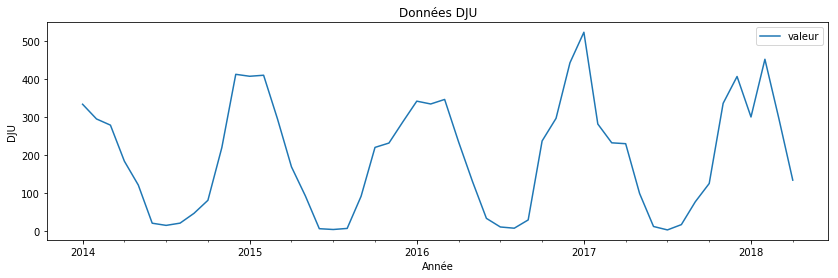

In [7]:
dju.plot(y='valeur', figsize=[14,4])
plt.xlabel('Année')
plt.ylabel('DJU')
plt.title('Données DJU')
plt.savefig("Graphiques/donnees_dju")
plt.show()

# Mission 1 : Corrigez les données de consommation mensuelles de l'effet température (dues au chauffage électrique) en utilisant une régression linéaire.

In [8]:
all_data = pd.merge(conso, dju, left_index=True, right_index=True)

In [9]:
import statsmodels.formula.api as smf

In [10]:
reg_simp = smf.ols('consommation~valeur', data=all_data).fit()
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:           consommation   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     526.5
Date:                Mon, 12 Aug 2019   Prob (F-statistic):           3.34e-28
Time:                        23:38:53   Log-Likelihood:                -364.83
No. Observations:                  52   AIC:                             733.7
Df Residuals:                      50   BIC:                             737.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4464.8367     63.700     70.092      0.0

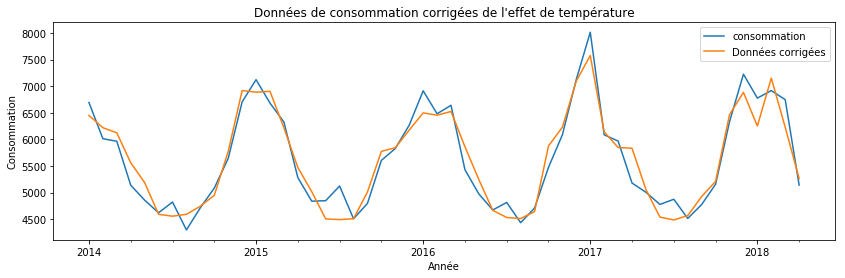

In [11]:
import seaborn as sns

all_data['pred'] = reg_simp.predict()

conso.plot(y='consommation', figsize=[14,4])
all_data['pred'].plot(label='Données corrigées')
plt.legend()
plt.xlabel('Année')
plt.ylabel('Consommation')
plt.title("Données de consommation corrigées de l'effet de température")
plt.savefig("Graphiques/données_corrigées.png")
plt.show()

# Mission 2 : Effectuez une désaisonnalisation à l'aide des moyennes mobiles

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
x = pd.DataFrame(all_data['pred'], index = all_data.index)
x.head()

,pred
date,
2014-01-01,6450.207493
2014-02-01,6220.278563
2014-03-01,6123.779894
2014-04-01,5560.870987
2014-05-01,5187.981065


In [14]:
x.to_csv("data")

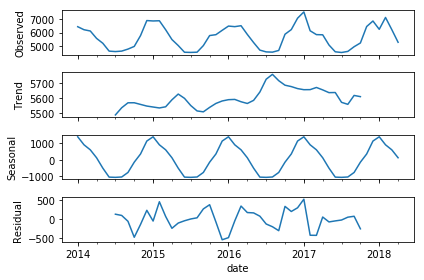

In [15]:
decomp_x = seasonal_decompose(x,  model='additive')
decomp_x.plot()
plt.savefig('Graphiques/decomposition_data.png')
plt.show()

In [1]:
z = decomp_x.trend
z = pd.DataFrame(z, index=x.index)

NameError: name 'decomp_x' is not defined

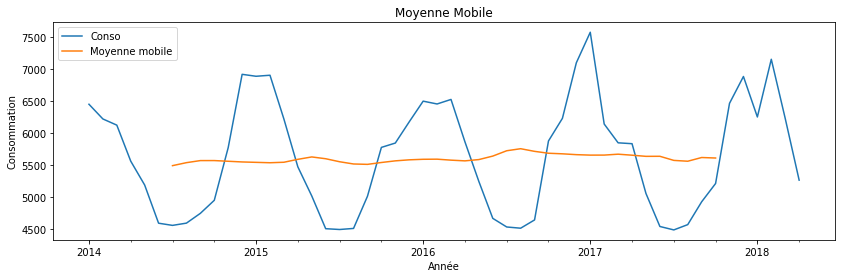

In [17]:
x['pred'].plot(figsize=(14,4), label='Conso')
z['pred'].plot(figsize=(14,4), label='Moyenne mobile')
plt.legend()
plt.xlabel('Année')
plt.ylabel('Consommation')
plt.title('Moyenne Mobile')
plt.savefig("Graphiques/moyenne_mobile.png")
plt.show()

# Mission 3 : Effectuez une prévision de la consommation sur un an

On commence par prendre une échantillon de x : <br/>
on effectuera la prédiction sur Mai 2017 à Mai 2018, on enlève donc ces valeurs : 

In [18]:
y = x.loc[x.index <= '2017-05-01']
delta = x.loc[x.index > '2017-05-01']

## Méthode de Holt Winters : 

In [19]:
from statsmodels.tsa.api import ExponentialSmoothing

In [20]:
from statsmodels.tsa.statespace.sarimax import *

C:\Users\jpaul\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:710: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


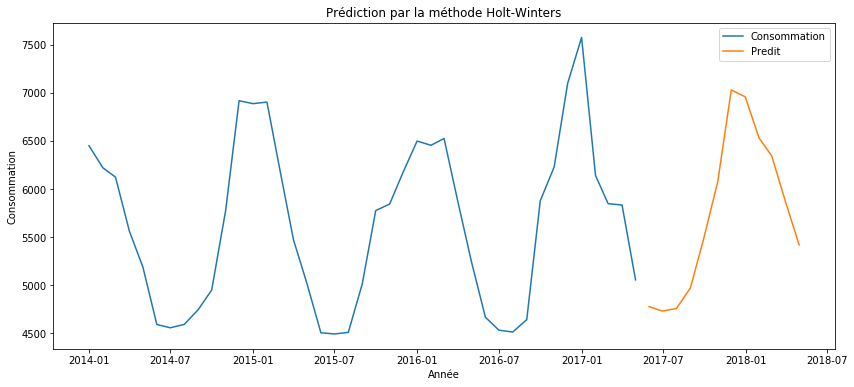

In [21]:
hw = ExponentialSmoothing(np.asarray(y['pred']), 
                          seasonal_periods=12, trend='add', 
                          seasonal='add').fit()
hw_pred = hw.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y['pred'], label='Consommation')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), hw_pred, label='Predit')
plt.legend()
plt.xlabel('Année')
plt.ylabel('Consommation')
plt.title('Prédiction par la méthode Holt-Winters')
plt.savefig("Graphiques/holt_winters_prev")
plt.show()

Regardons maintenant si la courbe pred ressemble bien à celle que l'on a pour 2018 : 

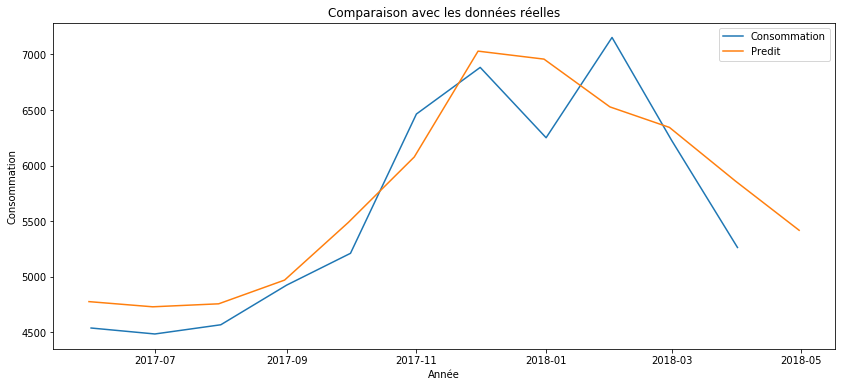

In [22]:
plt.figure(figsize=(14,6))
plt.plot(delta['pred'], label='Consommation')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), 
         hw_pred, 
         label='Predit')
plt.legend()
plt.xlabel('Année')
plt.ylabel('Consommation')
plt.title('Comparaison avec les données réelles')
plt.savefig("Graphiques/Holt_winters_comparaison")
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
print('Holt-Winters model MSE:{}'.format(mean_squared_error(x['pred']['2017-05':],hw_pred)))

Holt-Winters model MSE:219399.28073815085


## Méthode SARIMA : 

### Stationnarisation de la série : 

In [24]:
from functions import plot_sortie_acf
from statsmodels.tsa.stattools import acf, pacf

C:\Users\jpaul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


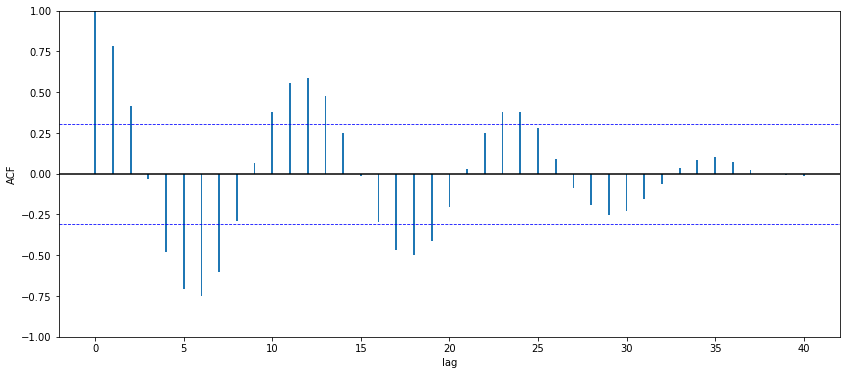

In [25]:
y_len = len(y['pred']) # variable nécessaire pour l'utilisation de plot_sortie_acf

plot_sortie_acf(acf(np.asarray(y['pred'])), y_len)

In [26]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
series = y['pred']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.793415
p-value: 0.002975
Critical Values:
	1%: -3.661
	5%: -2.961
	10%: -2.619


Le test est positif, la p_valeur n'étant pas très faible, nous allons effectuer une différenciation : 

(𝐼−𝐵^1) 

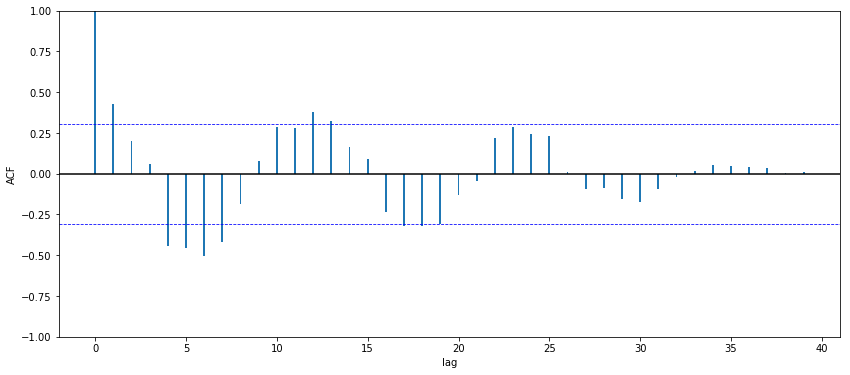

In [27]:
y_dif_1 =y['pred'] - y['pred'].shift(1)

plot_sortie_acf(acf(np.asarray(y_dif_1[1:])), y_len)

Test de dickey fuller pour vérifier

In [28]:
series = y_dif_1[1:]
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.859594
p-value: 0.000042
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623


On a enlevé la tendance et le test de Dickey-Fuller nous indique qu'il n'y a pas de unit root, le processus est donc stationnaire.

### Identification, estimation et validation de modèles

On s’appuie sur les autocorrélogrammes simple et partiels estimés :

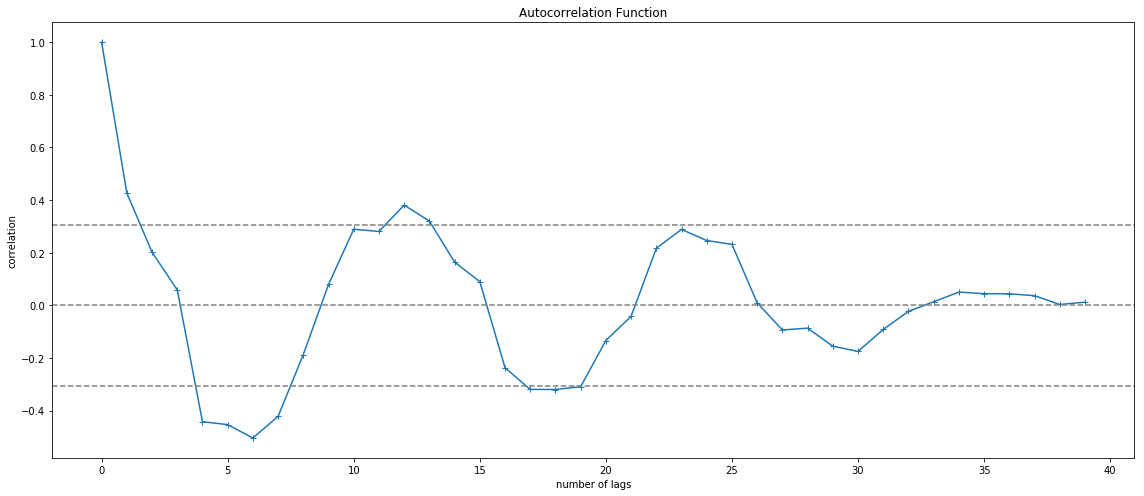

In [29]:
#autocorrélogrammes simple
lag_acf = acf(y_dif_1[1:], nlags=40)
#Plot ACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.savefig('Graphiques/autocorrelation_function.png')
plt.tight_layout()

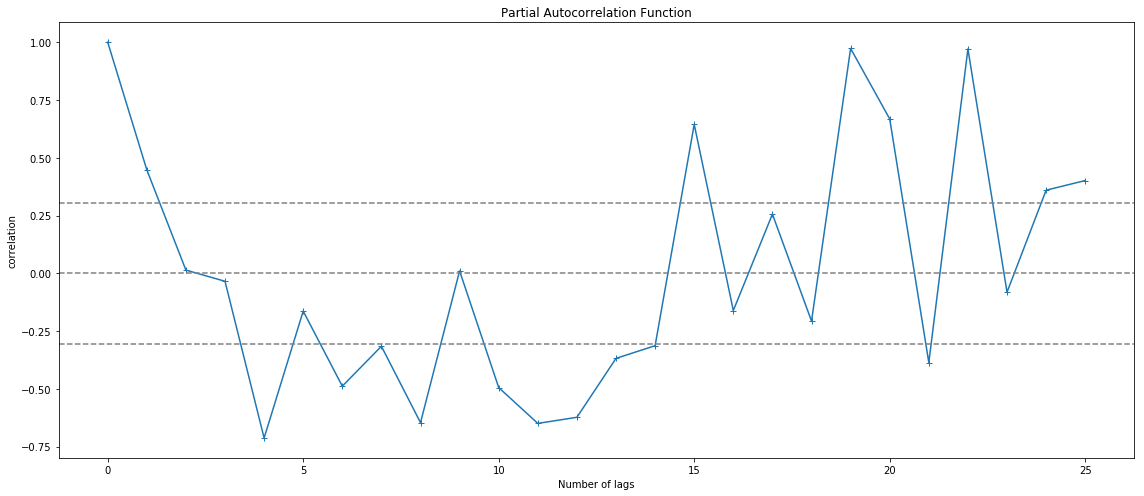

In [30]:
lag_pacf = pacf(y_dif_1[1:], nlags=25, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.savefig('Graphiques/partial_autocorrelation_function.png')
plt.tight_layout()

Testons d'abord avec un premier modèle : 

In [31]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

In [32]:
model1 = SARIMAX(np.asarray(y['pred']), order=(1,0,0), seasonal_order=(0,1,0,12))
results1 = model1.fit()
print(results1.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt)[1].mean()))

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   41
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -214.161
Date:                            Mon, 12 Aug 2019   AIC                            432.322
Time:                                    23:39:00   BIC                            435.057
Sample:                                         0   HQIC                           433.179
                                             - 41                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3877      0.123      3.148      0.002       0.146       0.629
sigma2      1.487e+05   4.13e+04   

In [33]:
from scipy.stats import shapiro

shapiro(results1.resid)

(0.7457010746002197, 4.6982179924270895e-07)

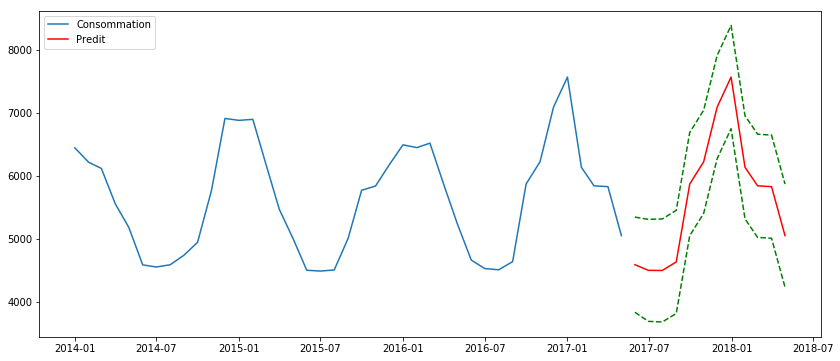

In [34]:
pred_model = results1.get_forecast(12)
pred = pred_model.predicted_mean
conf_int1 = pred_model.conf_int(alpha=0.05)

plt.figure(figsize=(14,6))
plt.plot(y['pred'], label='Consommation')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred, color='r', label='Predit')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), conf_int1, color='g', linestyle='--')
plt.legend()
plt.savefig('Graphiques/Pred_model1.png')
plt.show()

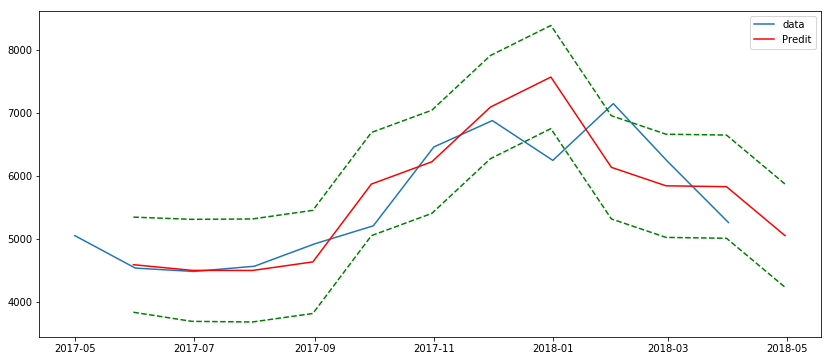

In [35]:
plt.figure(figsize=(14,6))
plt.plot(x['pred']['2017-05':], label='data')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred, color='r', label='Predit')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), conf_int1, color='g', linestyle='--')
plt.legend()
plt.savefig('Graphiques/model1_valeur.png')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
print('SARIMAX model MSE:{}'.format(mean_squared_error(x['pred']['2017-05':],pred)))

SARIMAX model MSE:412604.3160256332


In [37]:
mape=(np.abs(1-pred/x['pred']['2017-05':])).mean()*100
mape #Erreur relative absolue moyenne

8.394981105602765

Le modèle fit mais pas satisfaisant, il est moins bon que le modèle Holt-Winters

## Utilisation d'une boucle pour chercher les meilleurs paramètres

In [38]:
import warnings
import itertools

In [39]:
warnings.filterwarnings("ignore")

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Exemples de combinaisons pour SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Exemples de combinaisons pour SARIMA...
SARIMAX: (0, 0, 0) x (0, 0, 0, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [40]:
def best_param (df_col, p_max, d_max, q_max):
    
    warnings.filterwarnings("ignore") #Ignore les messages d'erreurs

    #Set up des paramètres maximum vus sur les autocorrélogrammes :
    p = range(0, p_max+1)
    d = range(0, d_max+1)
    q = range(0, q_max+1)
    
    #On crée les listes nous permettant de faire la boucle d'après : 
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    #Boucle qui récupère chacun des résultats AIC pour tous les paramètres :
    parametre = []
    sea_parametre = []
    aic_result = []
    mse = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(df_col,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
                results = mod.fit()
                parametre.append(param)
                sea_parametre.append(param_seasonal)
                aic_result.append(results.aic)
                
                #On récupère le Mean_Square_Error : 
                pred = results.get_forecast(12)
                result_pred = pred.predicted_mean
                result_pred = mean_squared_error(x['pred']['2017-05':],result_pred)
                mse.append(result_pred)
            except:
                continue
    
    #Mise en place du df avec les résultats : 
    parametre = pd.DataFrame(parametre ,columns=['p', 'd', 'q'])
    sea_parametre = pd.DataFrame(sea_parametre ,columns=['s_p', 's_d', 's_q', 's'])         
    aic_result = pd.DataFrame(aic_result ,columns=['AIC'])
    mse = pd.DataFrame(mse ,columns=['Mean_squared_error'])

    result = pd.merge(parametre, sea_parametre, left_index=True, right_index=True)
    result = pd.merge(result, aic_result, left_index=True, right_index=True)
    result = pd.merge(result, mse, left_index=True, right_index=True)

    #On récupère les valeurs minimales du MSE, qui sont donc nos config optimales :
    best = result.sort_values(by='Mean_squared_error', ascending=True)[0:4]
    
    return best

In [41]:
best_param(y['pred'], 2, 2, 2)

,p,d,q,s_p,s_d,s_q,s,AIC,Mean_squared_error


Les meilleurs paramètres actuellement sont : order=(0,1,0) ; seasonal_order=(1,0,1,12) ; Ce que laissait d'ailleurs entrevoir la partie stationnarisation de la série

## Modèle 2 

In [42]:
import statsmodels.api as sm

model2 = sm.tsa.statespace.SARIMAX(np.asarray(y['pred']),
                                   order=(0,1,0),
                                   seasonal_order=(1,0,1,12),
                                   enforce_stationarity=True,
                                   enforce_invertibility=True)
results2 = model2.fit()
print(results2.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results2.resid, lags=elt)[1].mean()))
    
from scipy.stats import shapiro
shapiro(results2.resid)

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   41
Model:             SARIMAX(0, 1, 0)x(1, 0, 1, 12)   Log Likelihood                -302.511
Date:                            Mon, 12 Aug 2019   AIC                            611.023
Time:                                    23:39:01   BIC                            616.089
Sample:                                         0   HQIC                           612.855
                                             - 41                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9938      0.028     35.764      0.000       0.939       1.048
ma.S.L12      -0.8948      0.241   

(0.5175052881240845, 2.0043713910844474e-10)

Les paramètres sont tous significatifs ; Le test de Shapiro indique une p-valeur < 5%, le résidu suit donc bien une loi normale ; Le test de l_jungbox nous indique que le résidu est bien un bruit blanc. Le modèle est donc satisfaisant. Voyons cela plus en détails :

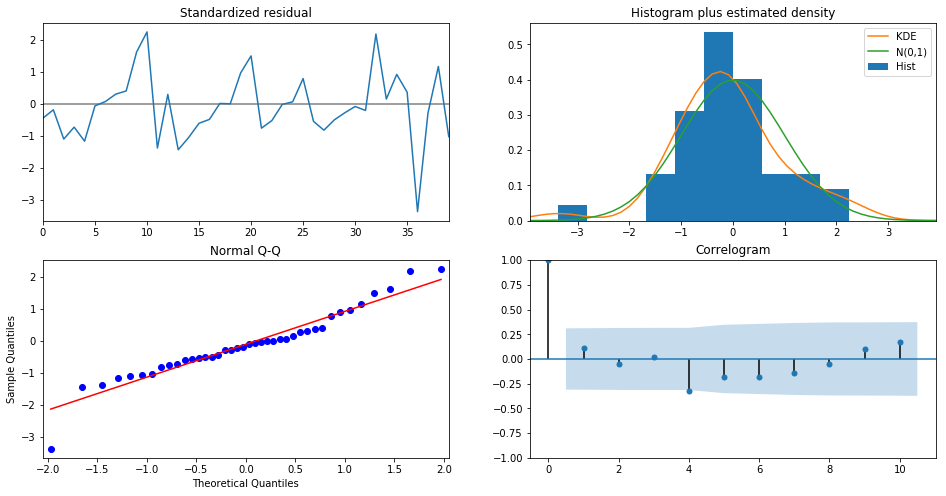

In [43]:
results2.plot_diagnostics(figsize=(16, 8))
plt.savefig('Graphiques/Diagnostic_model2.png')
plt.show()

Pas de trend sur les résidus (image haut gauche), ils semblent suivre une loi normale (image haut droite), le correlogram est bon (image bas droite), et la courbe est bonne (image bas gauche) : Except pour un point en bas à gauche

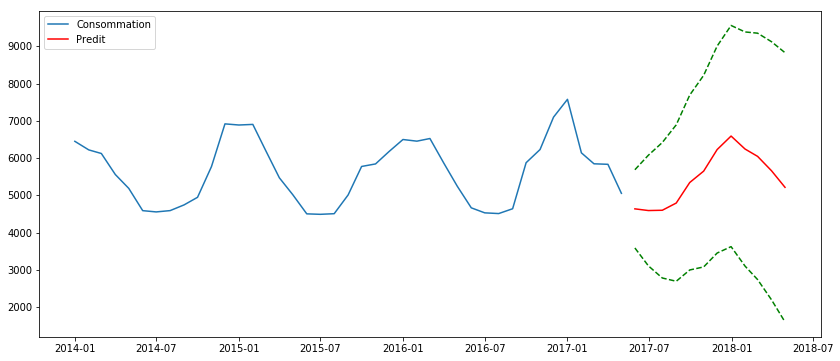

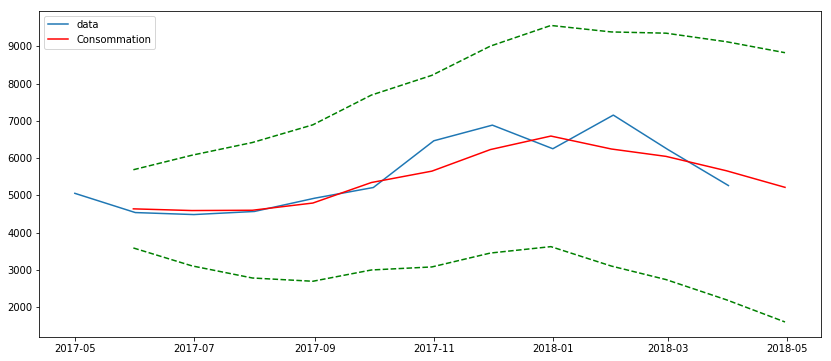

In [44]:
pred_model2 = results2.get_forecast(12)
pred2 = pred_model2.predicted_mean
conf_int2 = pred_model2.conf_int(alpha=0.01)

plt.figure(figsize=(14,6))
plt.plot(y['pred'], label='Consommation')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred2, color='r', label='Predit')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), conf_int2, color='g', linestyle='--')
plt.legend()
plt.savefig('Graphiques/pred_model2.png')
plt.show()

plt.figure(figsize=(14,6))
plt.plot(x['pred']['2017-05':], label='data')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred2, color='r', label='Consommation')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), conf_int2, color='g', linestyle='--')
plt.legend()
plt.savefig('Graphiques/model2_valeur.png')
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error
print('SARIMAX model MSE:{}'.format(mean_squared_error(x['pred']['2017-05':],pred2)))

SARIMAX model MSE:191716.04820986625


In [46]:
mape=(np.abs(1-pred2/x['pred']['2017-05':])).mean()*100
mape

5.6167187323110666

Le deuxième modèle est meilleur que le premier, on gardera donc celui là pour faire de la prédiction.